In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
url="https://raw.githubusercontent.com/Ashutoshrx/Covid-19/master/total_cases.csv"

In [47]:
training_set = pd.read_csv(url)

In [48]:
training_set.shape

(274, 213)

In [49]:
training_set.head(5)

,id,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,Sint Maarten (Dutch part),Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1,31-12-19,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2,01-01-20,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,3,02-01-20,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,4,03-01-20,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,5,04-01-20,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [50]:
rows=len(training_set)
rows

274

In [51]:
##
#training_set=training_set['World']
training_set = training_set.iloc[:,2:3].values

In [52]:
training_set.shape

(274, 1)

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [54]:
X_train = training_set[0:rows-1]
y_train = training_set[1:rows]

In [55]:
X_train = np.reshape(X_train, (rows-1, 1, 1))

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [57]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2515
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2323
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2149
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1709
Epoch 8/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1594
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1487
Epoch 10/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1396
Epoch 11/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1312
Epoch 12/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1244
Epoch 13/1000
9/9 [==============================

In [58]:
urltest="https://raw.githubusercontent.com/Ashutoshrx/Covid-19/master/total_cases.csv"
test_set = pd.read_csv(urltest)
rows=len(test_set)
real_value = test_set.iloc[:,2:3].values
inputs = real_value
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (rows, 1, 1))

In [59]:
predicted_value = regressor.predict(inputs)
predicted_value = sc.inverse_transform(predicted_value)


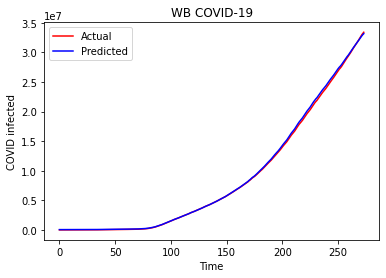

In [60]:
plt.plot(real_value, color = 'red', label = 'Actual')
#plt.set_size_inches(16,5)
plt.plot(predicted_value, color = 'blue', label = 'Predicted')
plt.title('WB COVID-19')
plt.xlabel('Time')
plt.ylabel('COVID infected')
plt.legend()

In [61]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(real_value,predicted_value)
from math import sqrt
rmse = sqrt(mse)
print("Mean Squared Error = ", mse)
print("Root Mean Squared Error = ", rmse)

Mean Squared Error =  37142485356.76124
Root Mean Squared Error =  192723.85777780923


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
R2_score = r2_score(real_value, predicted_value)
print('R2 score: ', R2_score)

R2 score:  0.999629121694593
